## TITANIC DATASET

### We are going to build a machine learning model in order to predict whether a passenger on the Titanic survived or not. 

In [242]:
# Import all the necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [243]:
titanic = pd.read_csv("tested.csv")
titanic.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S


## EDA using Data Visualisation

In [244]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### We dont know whether our data is clean or not so we will first clean the data

In [245]:
titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


<Axes: >

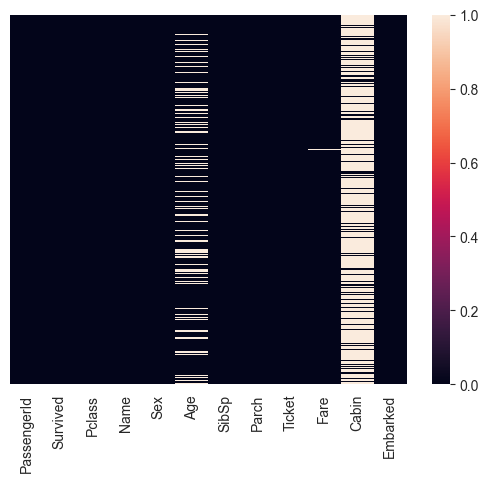

In [246]:
# Heatmap to check in which the null values are present
sns.heatmap(titanic.isnull(), yticklabels=False)

In [247]:
titanic['Age'].isna().sum()

86

In [248]:
titanic['Cabin'].isna().sum()

327

In [249]:
titanic['Fare'].isna().sum()

1

<Axes: xlabel='Survived', ylabel='count'>

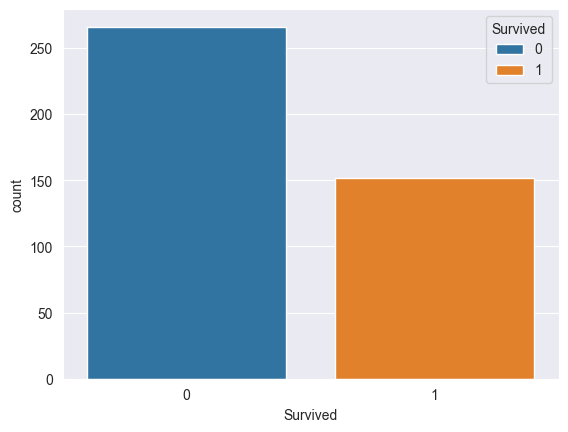

In [250]:
sns.set_style('darkgrid')
sns.countplot(titanic, x='Survived', hue="Survived")

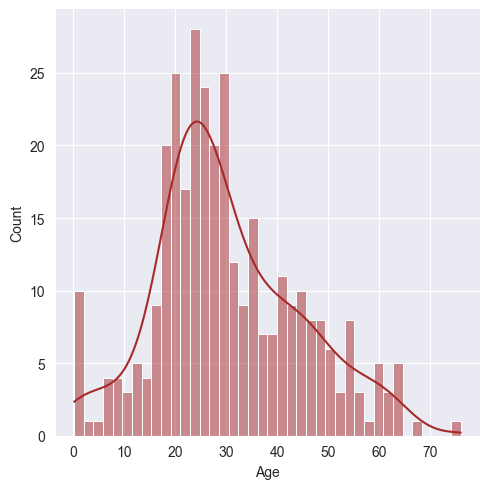

In [251]:
sns.displot(data=titanic['Age'].dropna(), kde='False', color='brown', bins=40) # bins=40 (i.e 40 columns of data)

<Axes: xlabel='Survived', ylabel='Age'>

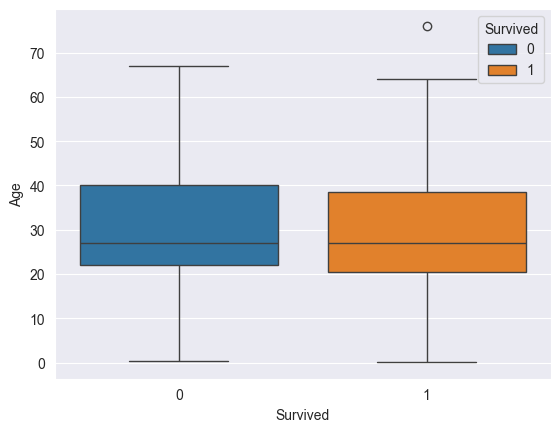

In [252]:
# people surviving on basis of age
sns.boxplot(titanic, x= 'Survived', y = 'Age', hue='Survived')

<Axes: xlabel='Survived', ylabel='Fare'>

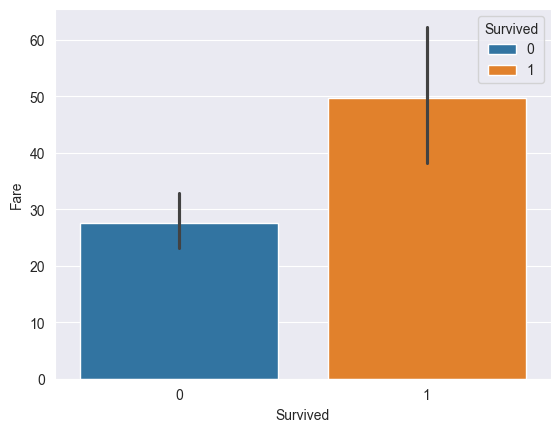

In [253]:
# people surviving on basis of fare
sns.barplot(titanic, x= 'Survived', y = 'Fare', hue='Survived')

<Axes: xlabel='Sex', ylabel='Count'>

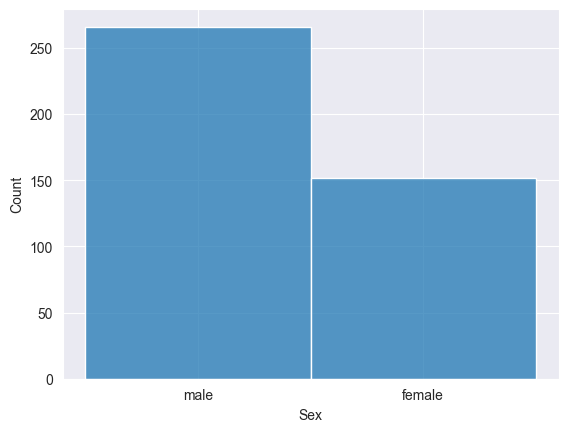

In [254]:
# people surviving on basis of sex
sns.histplot(titanic, x = 'Sex')

## DATA CLEANING

Now we are going to replace all the null values present in each and every column of the dataset 

C:\Users\goura\AppData\Local\Temp\ipykernel_11012\663959233.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Age', data=titanic, palette = 'winter')


<Axes: xlabel='Pclass', ylabel='Age'>

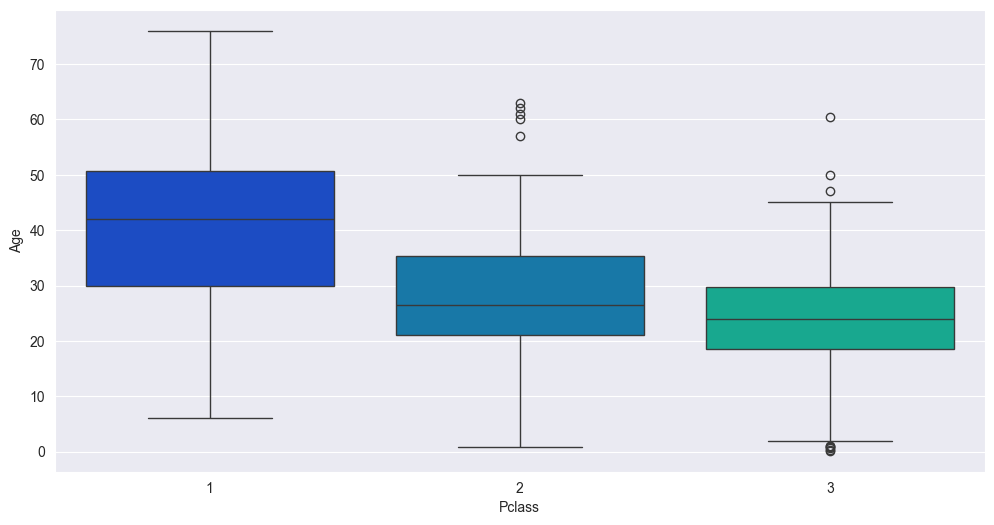

In [255]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Pclass', y='Age', data=titanic, palette = 'winter')

Above boxplot gave use estimation about the Age of people using the Pclass column. Now we can fill the NaN values of Age column

In [256]:
def age_col(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 42
        elif Pclass==2:
            return 26
        else:
            return 24
        
    else:
        return Age

In [257]:
titanic['Age'] = titanic[['Age', 'Pclass']].apply(age_col, axis=1)

C:\Users\goura\AppData\Local\Temp\ipykernel_11012\1460437891.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\goura\AppData\Local\Temp\ipykernel_11012\1460437891.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


In [258]:
titanic['Age'].isna().sum()
# The NaN values present in 'Age' column were handled properly

0

<Axes: >

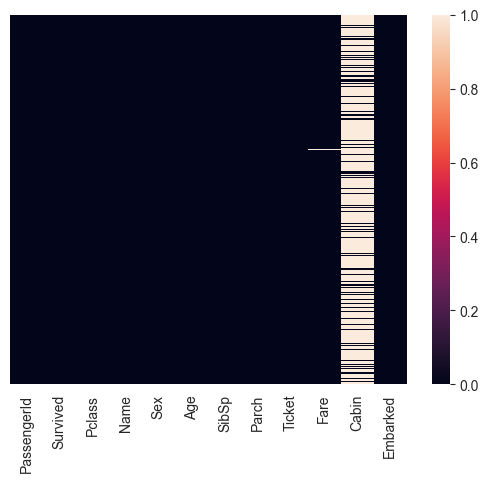

In [259]:
sns.heatmap(titanic.isnull(), yticklabels=False)

As the cabin column is having a lot of NaN values we will drop the entire column as it is not making a much of impact

In [260]:
titanic.drop('Cabin', axis=1, inplace=True)

In [261]:
titanic.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,S


<Axes: >

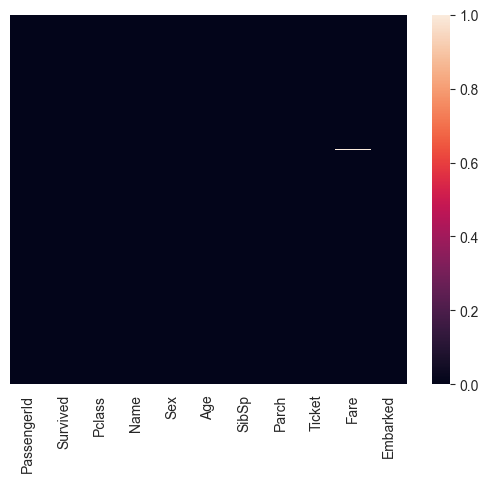

In [262]:
sns.heatmap(titanic.isnull(), yticklabels=False)
# We have now handled the cabin column as well
# Only one missing value is remaining and that is in the fare column 

As the fare column is having only 1 missing value we will replace that with the previous value in the dataset

In [263]:
# We will create another dataset to store the cleaned data without any missing values
cleaned_titanic = titanic.fillna(method='ffill')
cleaned_titanic

C:\Users\goura\AppData\Local\Temp\ipykernel_11012\3578141126.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cleaned_titanic = titanic.fillna(method='ffill')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,S


<Axes: >

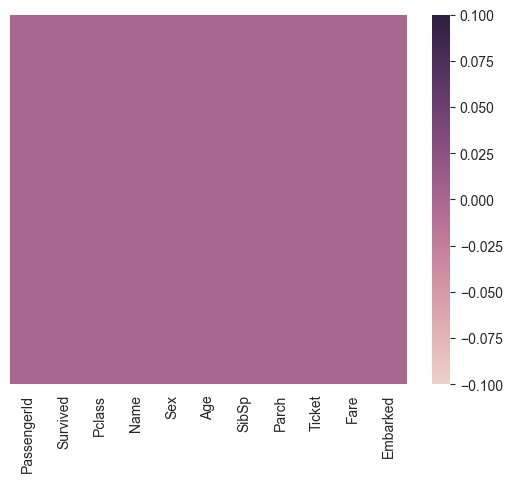

In [264]:
sns.heatmap(cleaned_titanic.isnull(), yticklabels=False, cmap=sns.cubehelix_palette(as_cmap=True))

## Convert The Categorical Variables

Here we will create dummy variables to convert the categorical values to numerical values so that our model can read it

In [265]:
cleaned_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.1+ KB


In [266]:
# map the Age column with 0 for female and 1 for male
cleaned_titanic['Sex'] = cleaned_titanic['Sex'].map({"male": 1, "female": 0})

In [267]:
# Drop the columns which are not making not much of a impact on the target variable
cleaned_titanic.drop(['Name', 'Embarked', 'Ticket', 'PassengerId'], axis=1, inplace=True)
cleaned_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,34.5,0,0,7.8292
1,1,3,0,47.0,1,0,7.0000
2,0,2,1,62.0,0,0,9.6875
3,0,3,1,27.0,0,0,8.6625
4,1,3,0,22.0,1,1,12.2875


# Machine Learning Model Building

### Train Test Split

In [268]:
x = cleaned_titanic.drop('Survived', axis=1) # input vaiables

In [269]:
y = cleaned_titanic['Survived'] # target variable

In [270]:
from sklearn.model_selection import train_test_split

In [271]:
# Split the data into training and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [272]:
x_train.shape

(292, 6)

In [273]:
y_train.shape

(292,)

In [274]:
# importing classification models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [275]:
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train) # We have trained our model for further predictions

C:\Users\goura\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [276]:
predicted_values = logmodel.predict(x_test)
predicted_values

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [277]:
logmodel.score(x, y)

1.0

In [278]:
# knn classifier model
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train,y_train)
kpred = knn.predict(x_test)
kcm = confusion_matrix(y_test,kpred)
kacc = accuracy_score(y_test,kpred)
print(f'The confusion matrix is:\n{kcm}\nThe accuracy is: {round((kacc*100), 2)}%')

The confusion matrix is:
[[79  6]
 [28 13]]
The accuracy is: 73.02%


In [279]:
# Decision Tree algorithm
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dpred = dtc.predict(x_test)
dcm = confusion_matrix(y_test,dpred)
dacc = accuracy_score(y_test,dpred)
print(f'The confusion matrix is:\n{dcm}\nThe accuracy is: {dacc*100}%')

The confusion matrix is:
[[85  0]
 [ 0 41]]
The accuracy is: 100.0%


In [280]:
# Random Forest algorithm
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
rpred = rfc.predict(x_test)
rcm = confusion_matrix(y_test,rpred)
racc = accuracy_score(y_test,rpred)
print(f'The confusion matrix is:\n{rcm}\nThe accuracy is: {racc*100}%')

The confusion matrix is:
[[85  0]
 [ 0 41]]
The accuracy is: 100.0%


## Confusion Matrix

In [281]:
from sklearn.metrics import confusion_matrix

In [282]:
# confusion matrix for logistic regression
cm = confusion_matrix(y_test, predicted_values)
cm

array([[85,  0],
       [ 0, 41]], dtype=int64)

In [283]:
# confusion matrix for knn classifier
cm = confusion_matrix(y_test, kpred)
cm

array([[79,  6],
       [28, 13]], dtype=int64)

In [284]:
# confusion matrix for decision tree classifier 
cm = confusion_matrix(y_test, dpred)
cm

array([[85,  0],
       [ 0, 41]], dtype=int64)

In [285]:
# confusion matrix for random forest classifier
cm = confusion_matrix(y_test, rpred)
cm

array([[85,  0],
       [ 0, 41]], dtype=int64)

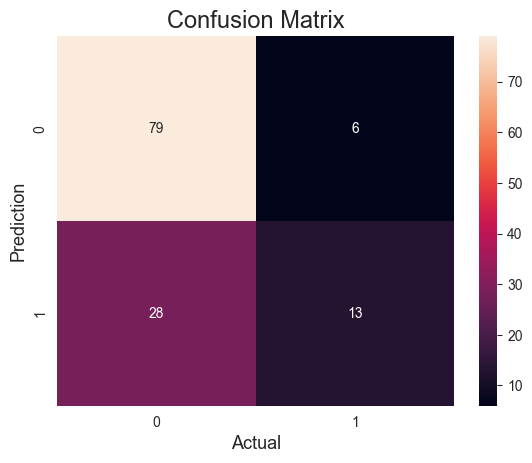

In [286]:
#compute the confusion matrix for knn classifier
cm = confusion_matrix(y_test,kpred)
 
#Plot the confusion matrix.
sns.heatmap(cm, annot=True, fmt='g'), 
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

Note: ***Except KNeighbours all the algorithms gave 100% accuracy, its because of slight imbalance nature of data